In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-fehosvil because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
m0_scale    = 14
m0_min      = 3.6
m0_max      = 14
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

total 20M
-rw-r--r-- 1 bbbam us_cms 9.9M Sep 17 17:58 epoch6_val_pseudoscalar_mae2.0871_inference_data.pkl
-rw-r--r-- 1 bbbam us_cms 9.9M Sep 17 18:05 epoch6_val_pseudoscalar_mae2.0793_inference_data.pkl


In [7]:
### ---- mass_trainer_aToTauTau_m1p2To17p2_v2_13ch ---

In [27]:
# #U to 2tau validation sample

In [31]:
≈

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_U_2Tau13_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch6_val_pseudoscalar_mae2.0871_inference_data.pkl


In [32]:
# out_dir = f"PLOTS_for_massregressor_Validation_Upsilon"
# save = 0
# if save: 
#     if not os.path.isdir(out_dir):
#         os.makedirs(out_dir)


loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_U_2Tau13_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch6_val_pseudoscalar_mae2.0871_inference_data.pkl


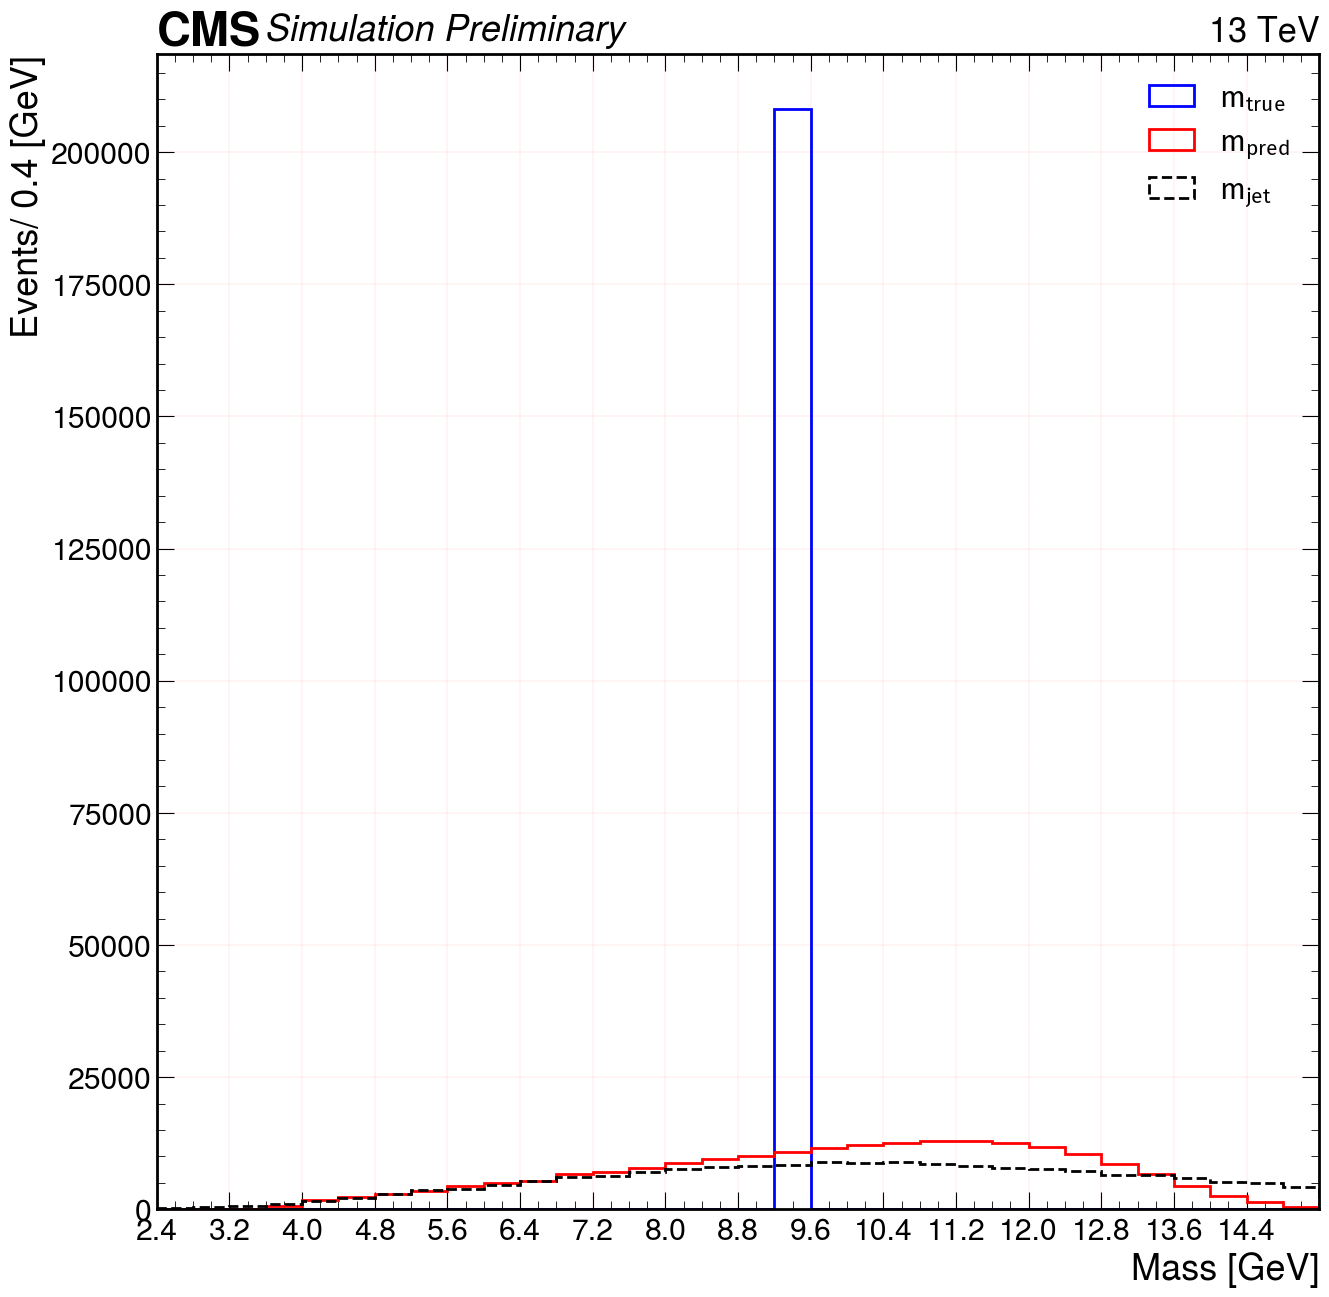

In [97]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_U_2Tau13_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch6_val_pseudoscalar_mae2.0871_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]

# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,15))
# hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap,density=1)
# plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
# plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
# plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(3.6, 14.1, .8),size=15)
# plt.yticks(np.arange(3.6, 14.1, .8),size=15)
# plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
# plt.grid(color='r', linestyle='--', linewidth=.5)

# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
# plt.show()

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_U_2Tau13_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch6_val_pseudoscalar_mae2.0793_inference_data.pkl


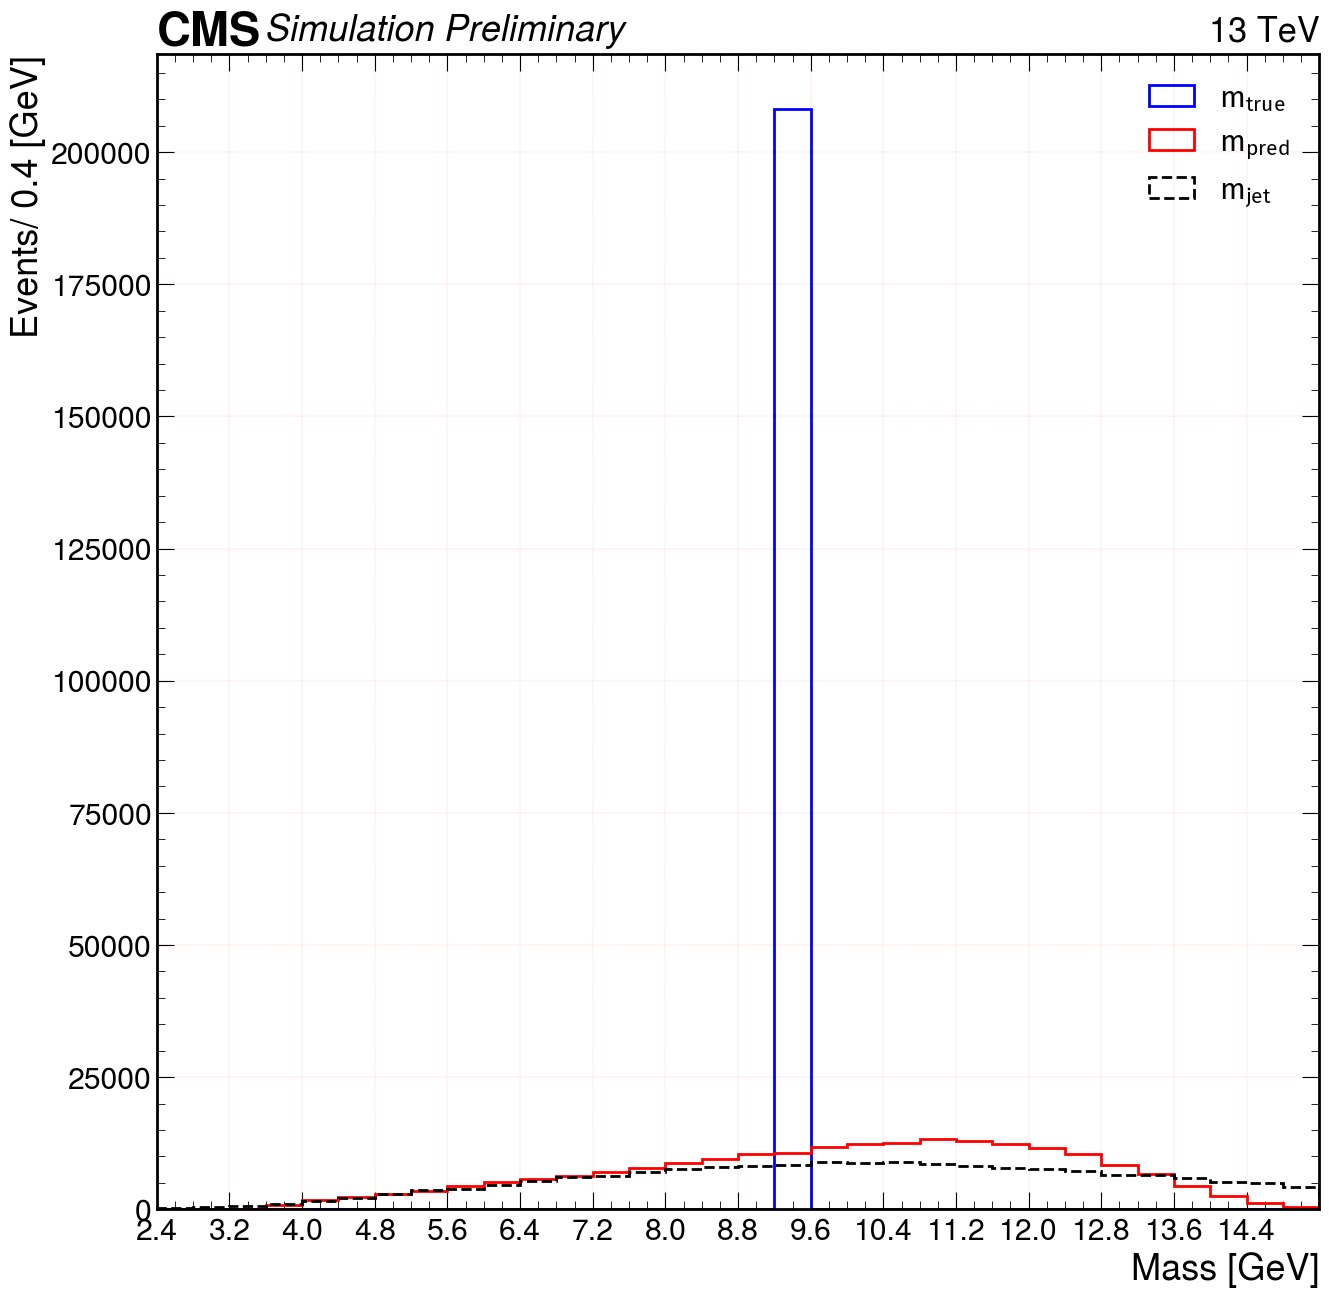

In [42]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_U_2Tau13_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch6_val_pseudoscalar_mae2.0793_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()


m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]

# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


total 13M
-rw-r--r-- 1 bbbam us_cms 13M Sep 17 13:27 epoch14_val_pseudoscalar_mae1.8816_inference_data.pkl


In [49]:
### ---- mass_trainer_aToTauTau_m1p2To17p2_v2_5ch ---

In [9]:
## H to A to 4tau signal sample Mass =10 Gev

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_H_AA_4Tau5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch14_val_pseudoscalar_mae1.8816_inference_data.pkl


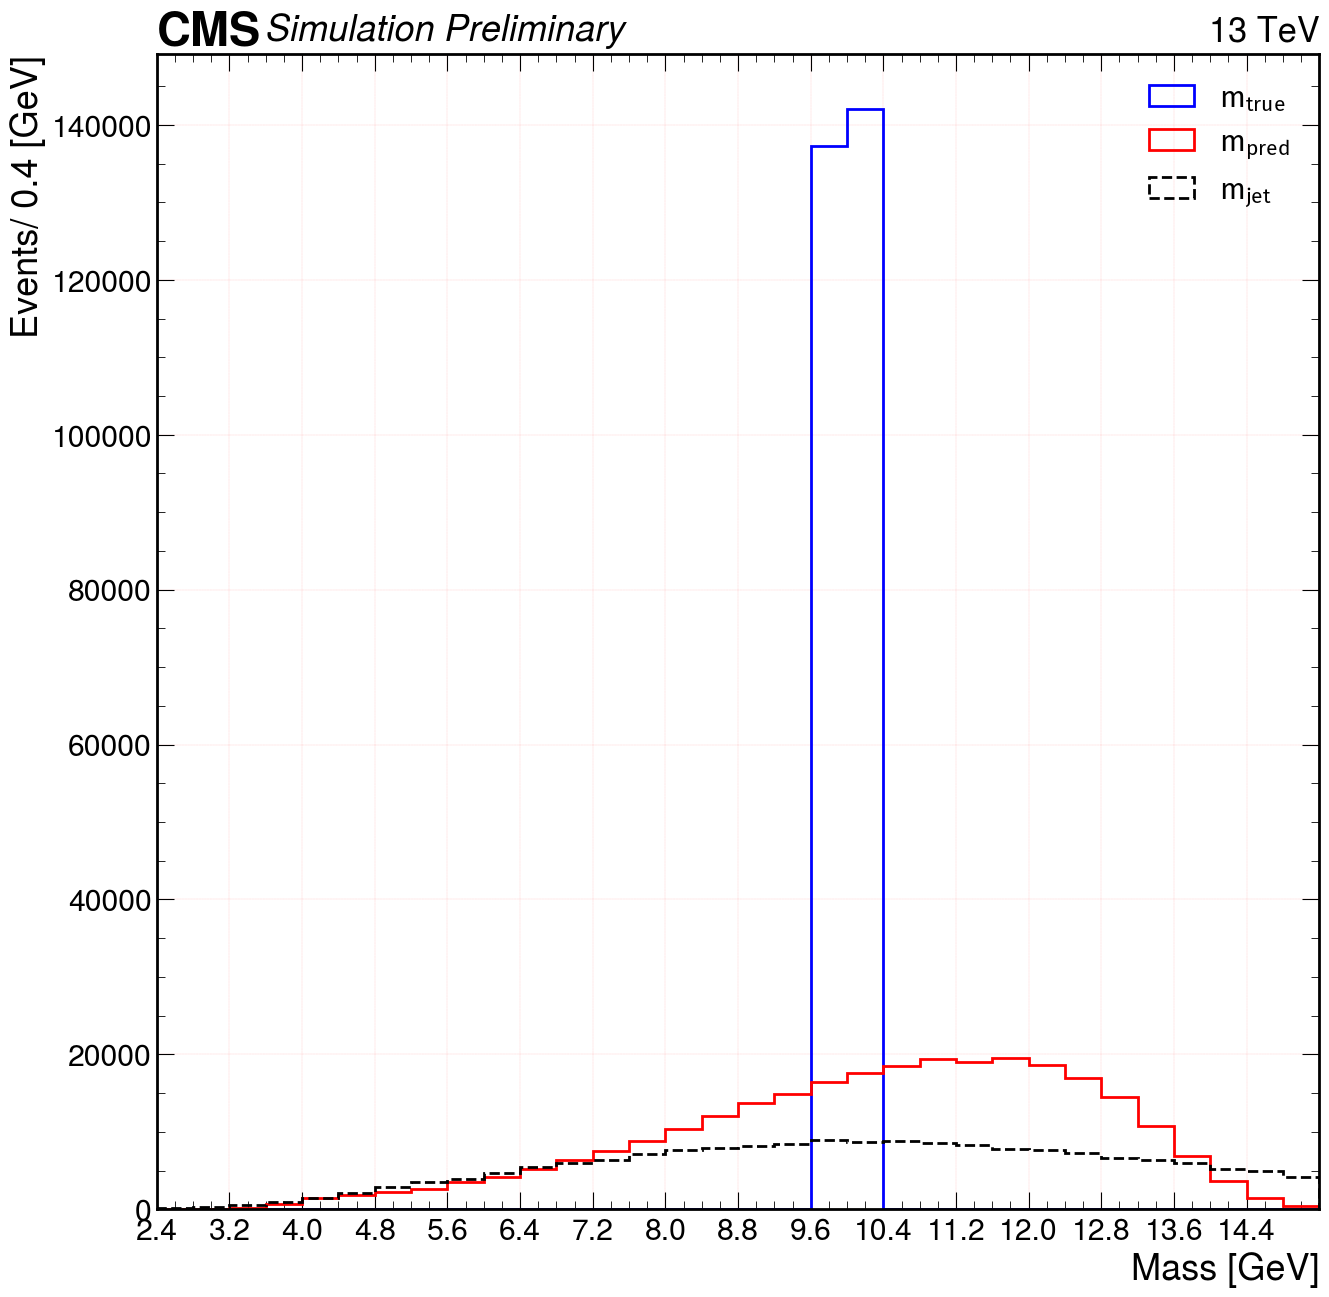

In [53]:

data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_H_AA_4Tau5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch14_val_pseudoscalar_mae1.8816_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


In [60]:
###----mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_13ch----


total 9.9M
-rw-r--r-- 1 bbbam us_cms 9.9M Sep 17 19:11 epoch9_val_pseudoscalar_mae2.0002_inference_data.pkl


In [ ]:
###----H to AA to 4Tau---

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_13ch/INFERENCE_DATA/INFERENCE_13_channels_HToAATo4Tau_pT30To180_with_mass1p2To17p2_v2/epoch9_val_pseudoscalar_mae1.9807_inference_data.pkl


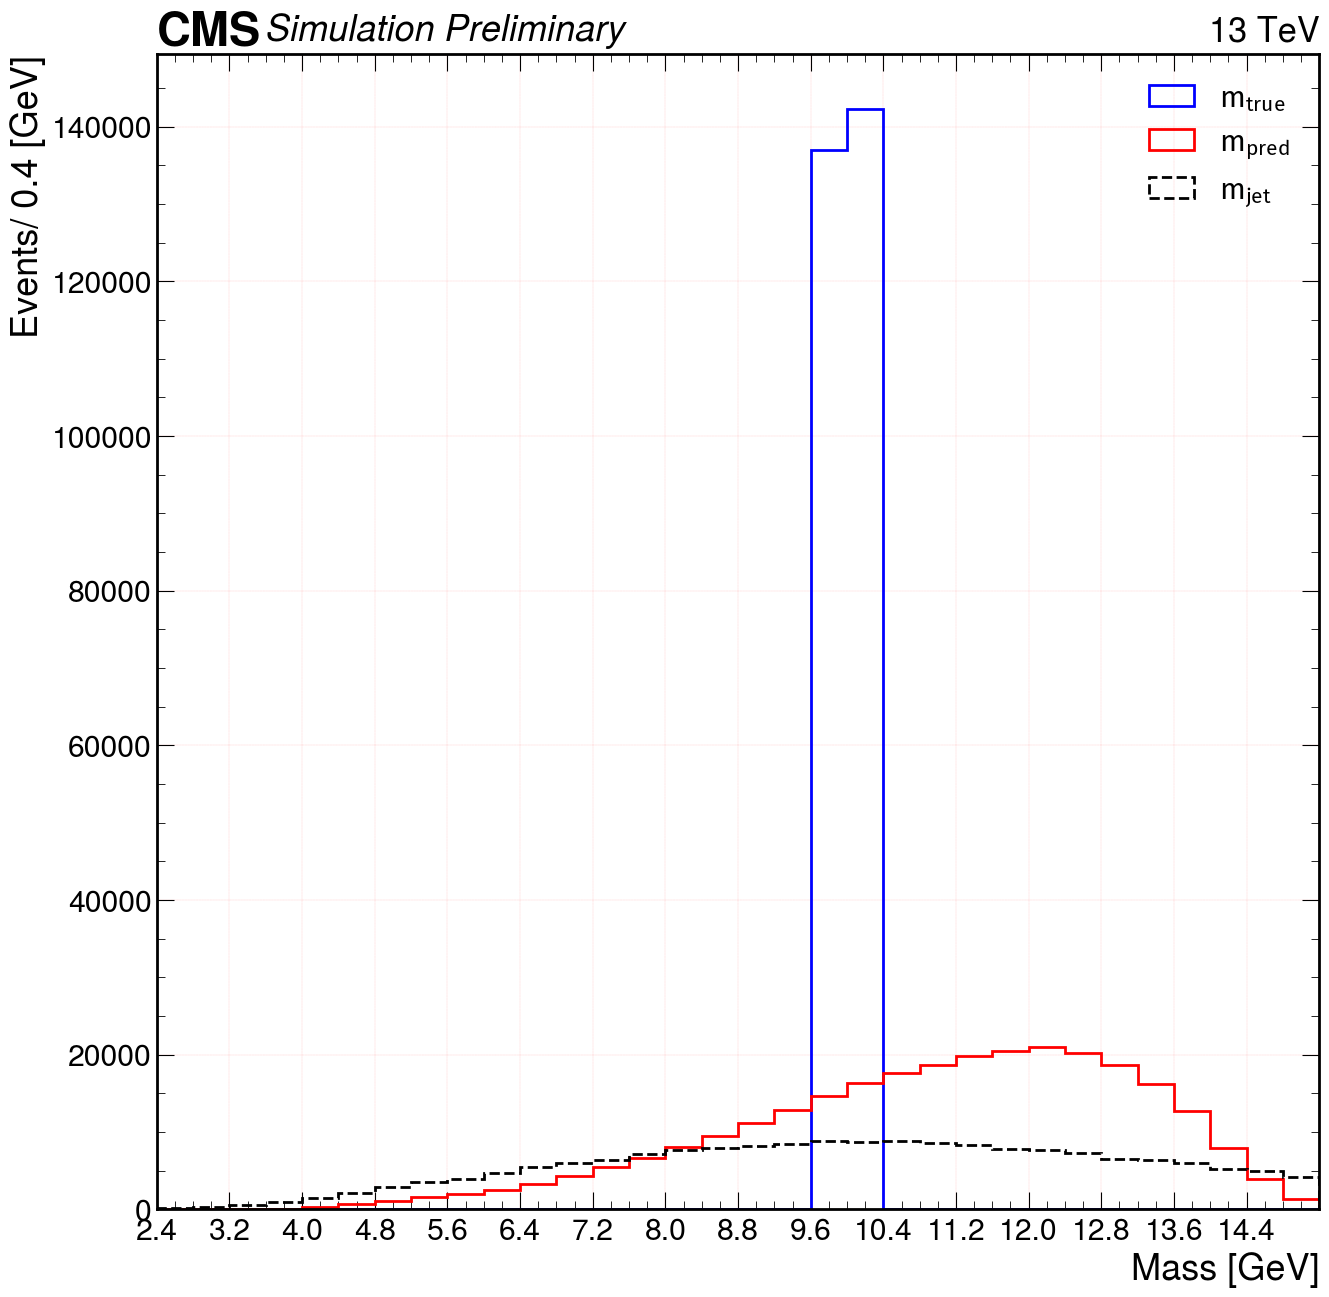

In [58]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_13ch/INFERENCE_DATA/INFERENCE_13_channels_HToAATo4Tau_pT30To180_with_mass1p2To17p2_v2/epoch9_val_pseudoscalar_mae1.9807_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


In [8]:
## Upsilon to Tau Tau validation sample

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_13ch/INFERENCE_DATA/INFERENCE_13_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch9_val_pseudoscalar_mae2.0002_inference_data.pkl


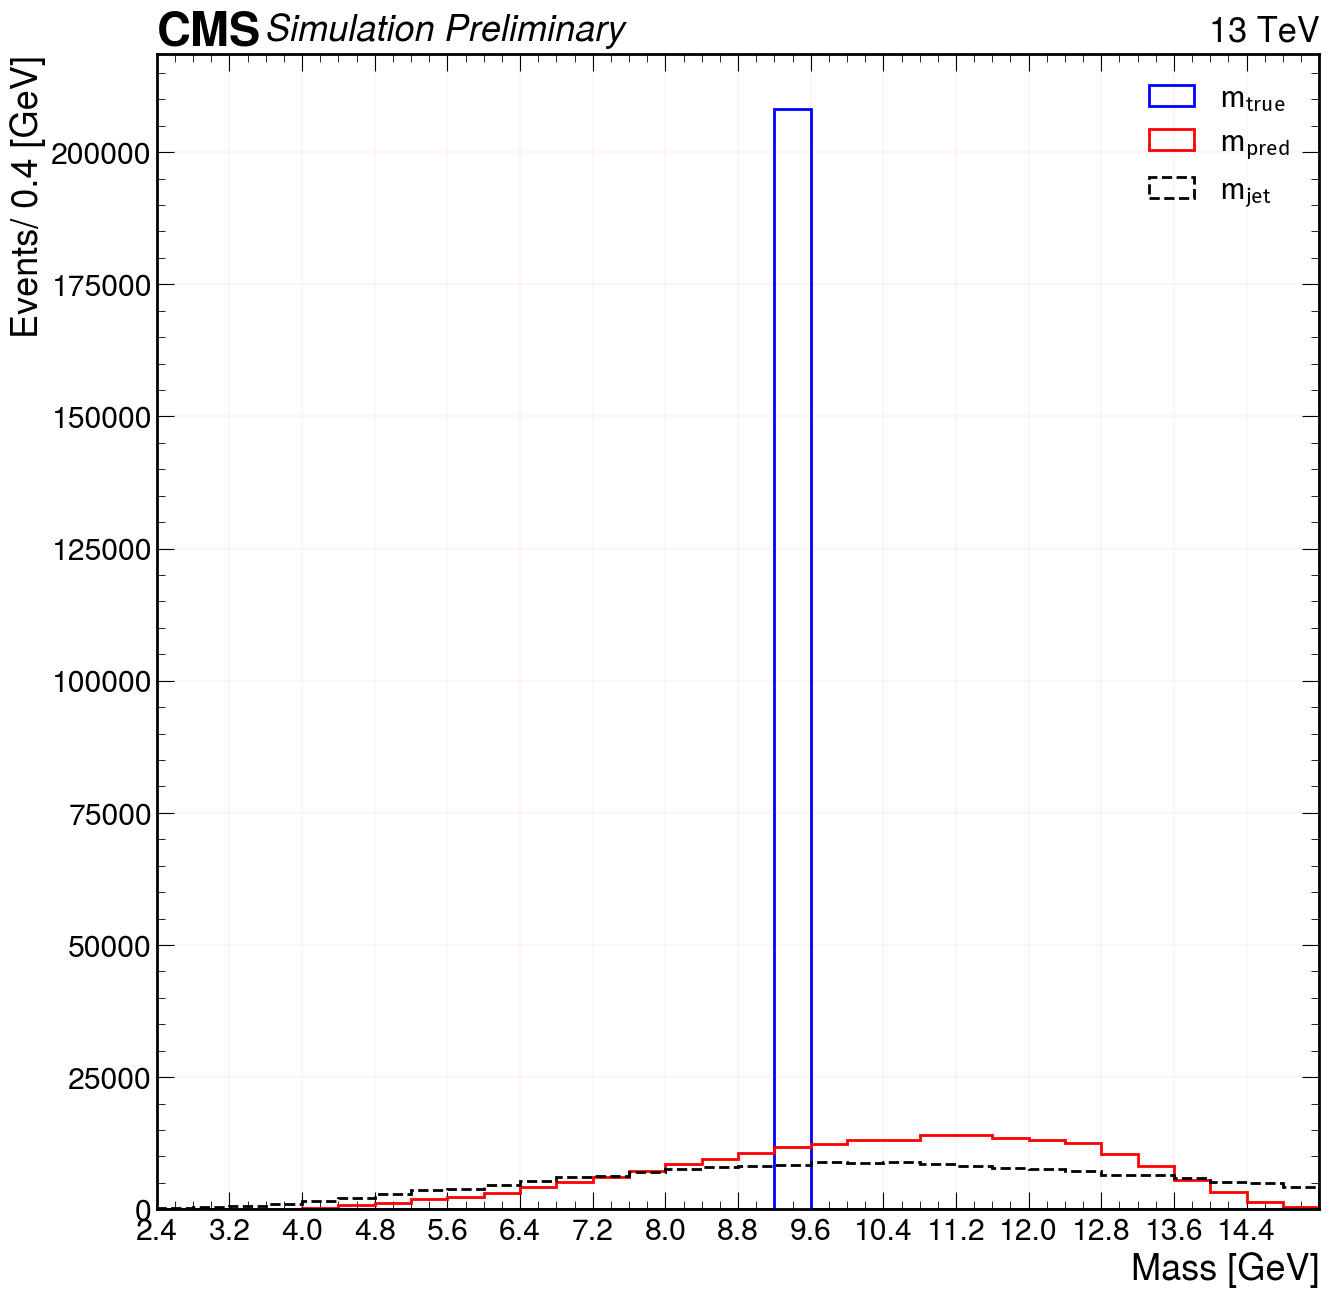

In [61]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_13ch/INFERENCE_DATA/INFERENCE_13_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch9_val_pseudoscalar_mae2.0002_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


In [ ]:
#--------------mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_13ch----------------------

In [67]:
#------------H to AA To 4Tau-------------

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_13ch/INFERENCE_DATA/INFERENCE_13_channels_HToAATo4Tau_pT30To180_with_mass1p2To17p2_v2/epoch9_val_pseudoscalar_mae1.9429_inference_data.pkl


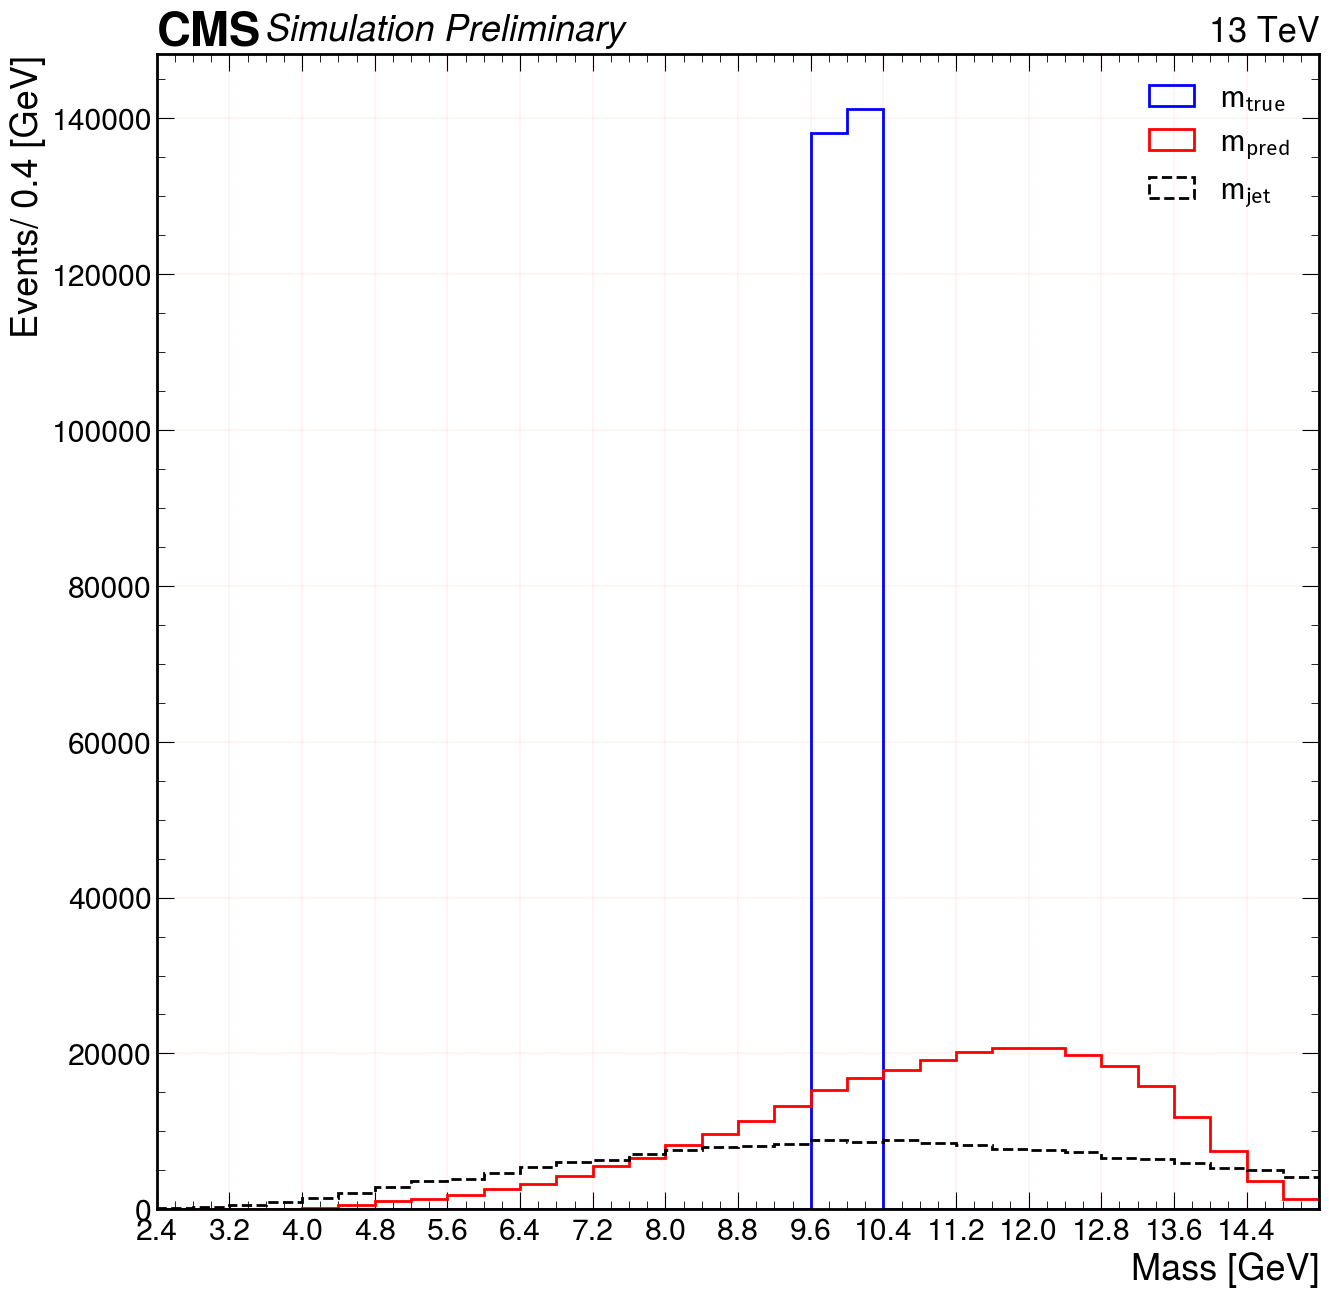

In [68]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_13ch/INFERENCE_DATA/INFERENCE_13_channels_HToAATo4Tau_pT30To180_with_mass1p2To17p2_v2/epoch9_val_pseudoscalar_mae1.9429_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

In [ ]:
###-------------------U To 2Tau------------

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_13ch/INFERENCE_DATA/INFERENCE_13_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch9_val_pseudoscalar_mae2.0092_inference_data.pkl


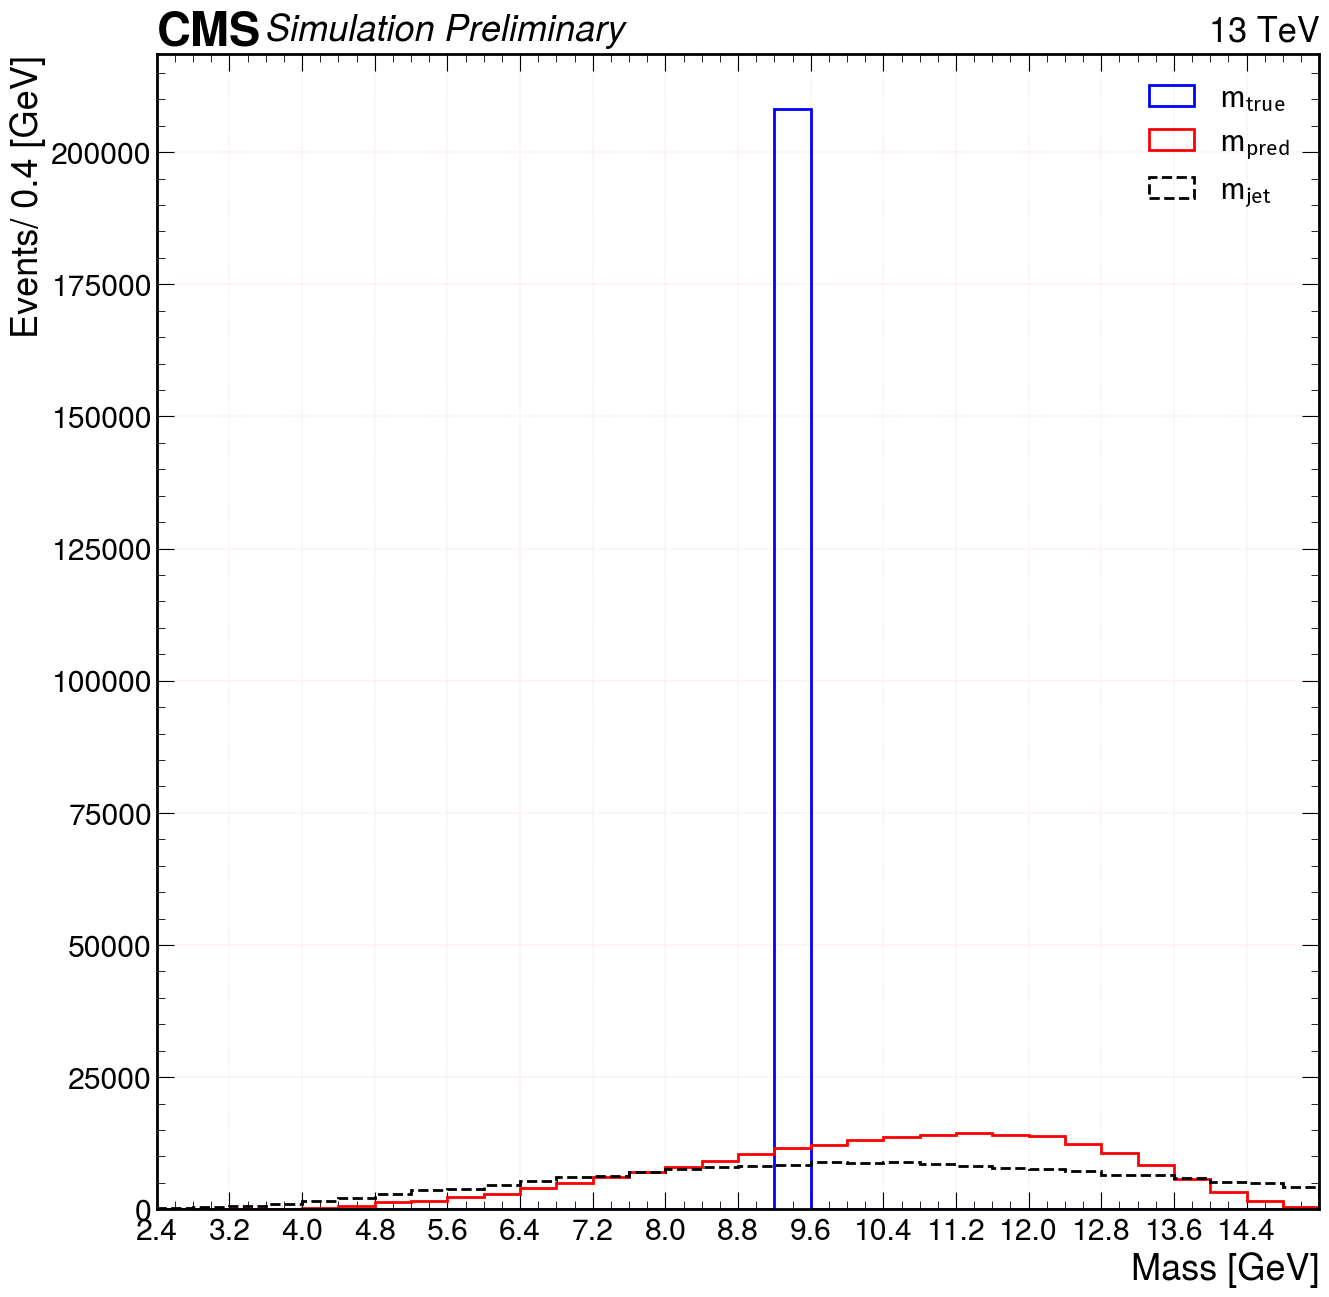

In [71]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_13ch/INFERENCE_DATA/INFERENCE_13_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch9_val_pseudoscalar_mae2.0092_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

total 9.9M
-rw-r--r-- 1 bbbam us_cms 9.9M Sep 17 23:48 epoch15_val_pseudoscalar_mae1.9114_inference_data.pkl


In [ ]:
### ---mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_5ch--

In [ ]:
###---H To AA To 4Tau

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_5ch/INFERENCE_DATA/INFERENCE_5_channels_HToAATo4Tau_pT30To180_with_mass1p2To17p2_v2/epoch15_val_pseudoscalar_mae1.8452_inference_data.pkl


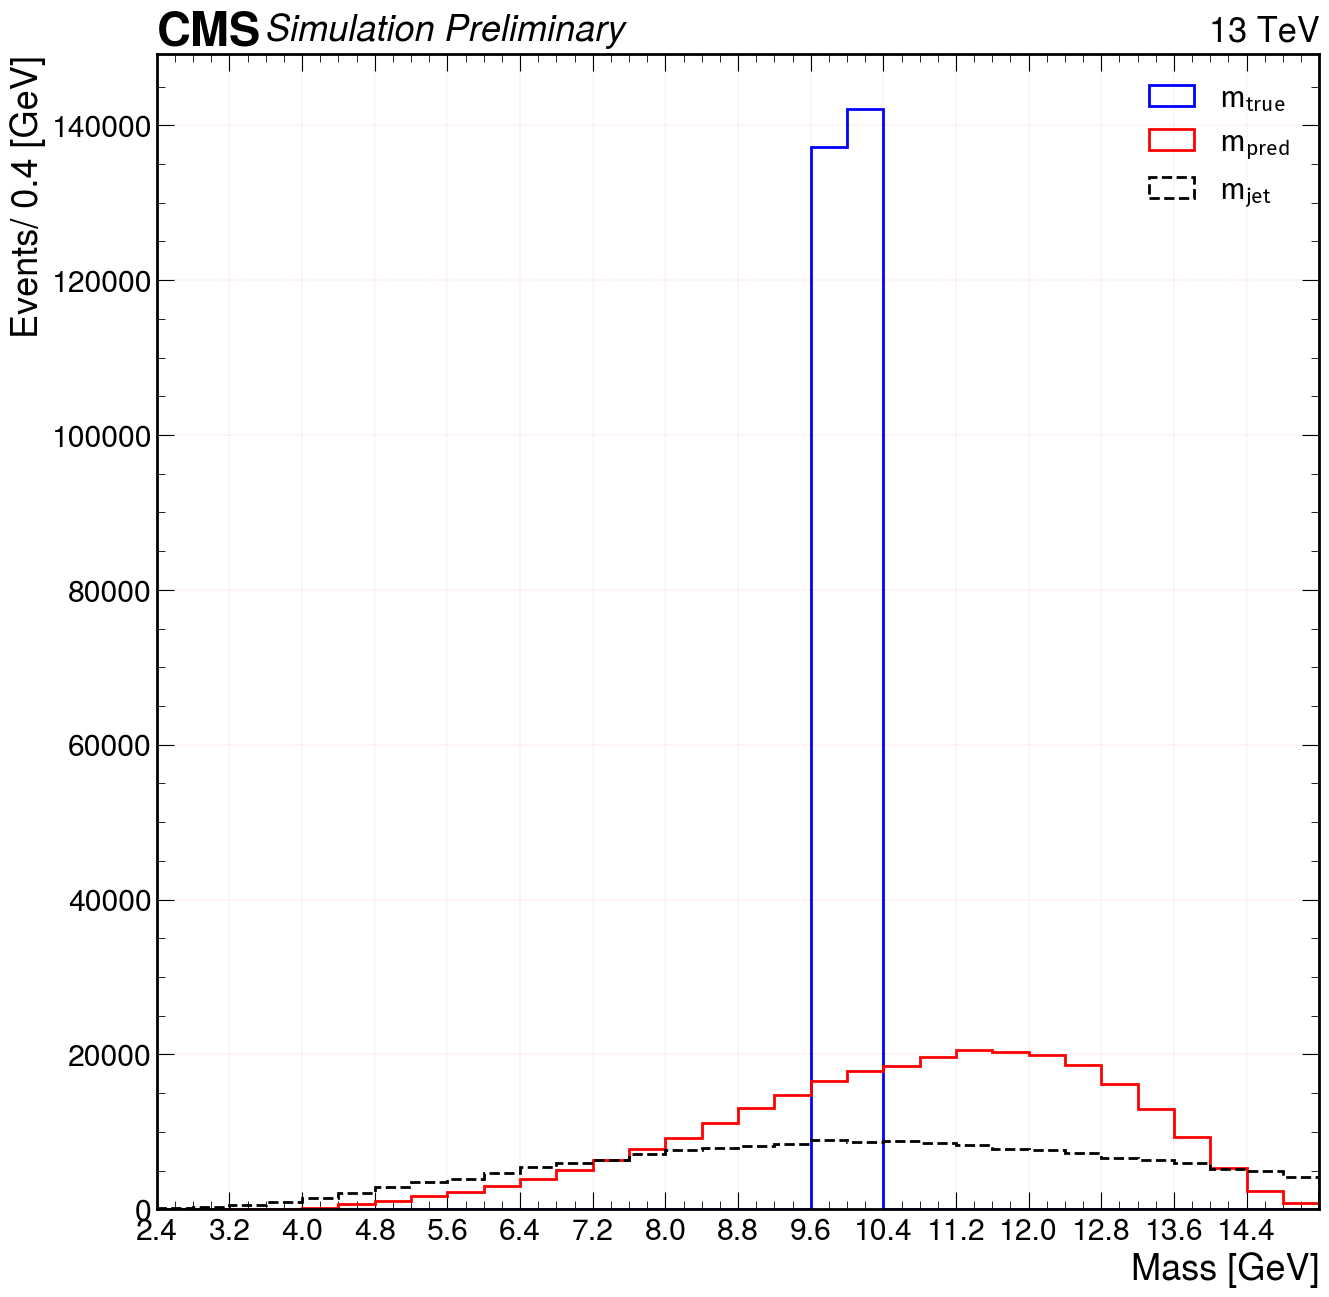

In [81]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_5ch/INFERENCE_DATA/INFERENCE_5_channels_HToAATo4Tau_pT30To180_with_mass1p2To17p2_v2/epoch15_val_pseudoscalar_mae1.8452_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

In [ ]:
####---------------U To 2TAu----

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_5ch/INFERENCE_DATA/INFERENCE_5_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch15_val_pseudoscalar_mae1.9114_inference_data.pkl


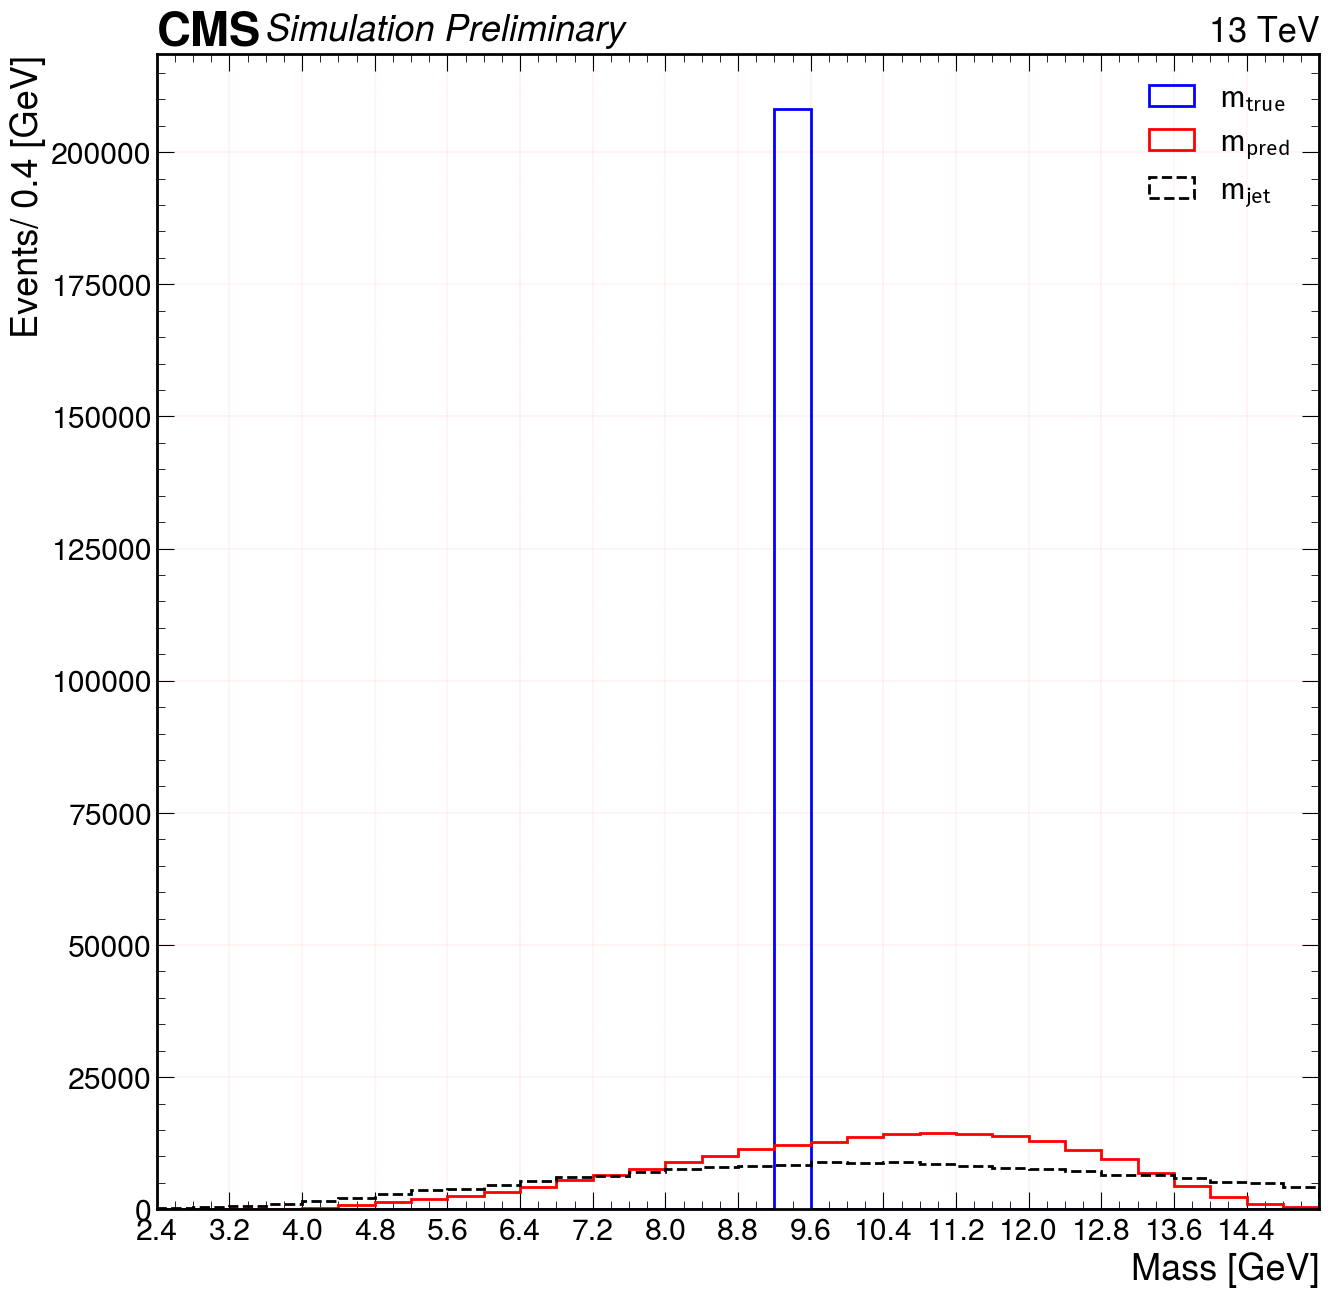

In [84]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_5ch/INFERENCE_DATA/INFERENCE_5_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch15_val_pseudoscalar_mae1.9114_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

In [94]:
!ls -lhtr ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_5ch/INFERENCE_DATA/INFERENCE_5_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2

total 9.9M
-rw-r--r-- 1 bbbam us_cms 9.9M Sep 17 23:54 epoch15_val_pseudoscalar_mae2.0441_inference_data.pkl


In [86]:
####-----------------/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_5ch-------------------

In [70]:
ls -lhtr 

total 9.9M
-rw-r--r-- 1 bbbam us_cms 9.9M Sep 17 19:09 epoch9_val_pseudoscalar_mae2.0092_inference_data.pkl


In [87]:
####--------H To AA To 4Tau-------------------------

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_5ch/INFERENCE_DATA/INFERENCE_5_channels_HToAATo4Tau_pT30To180_with_mass1p2To17p2_v2/epoch15_val_pseudoscalar_mae1.9839_inference_data.pkl


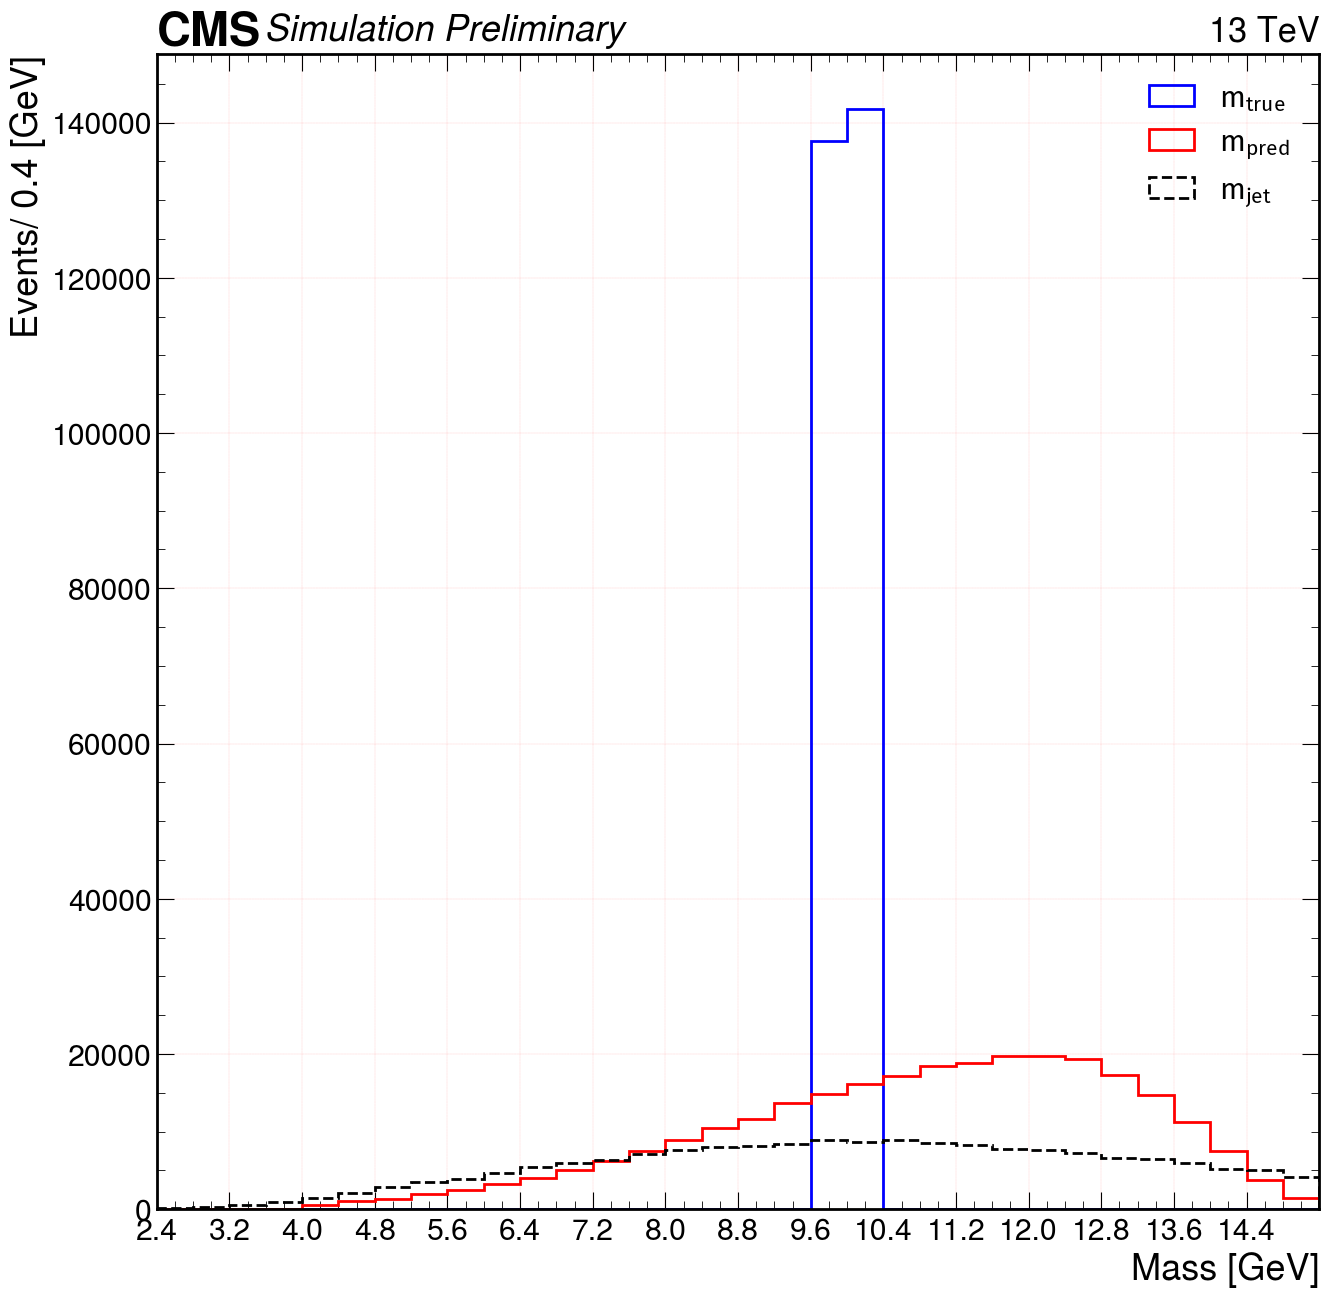

In [92]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_5ch/INFERENCE_DATA/INFERENCE_5_channels_HToAATo4Tau_pT30To180_with_mass1p2To17p2_v2/epoch15_val_pseudoscalar_mae1.9839_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

In [ ]:
#### U To 2Tau---------------

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_5ch/INFERENCE_DATA/INFERENCE_5_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch15_val_pseudoscalar_mae2.0441_inference_data.pkl


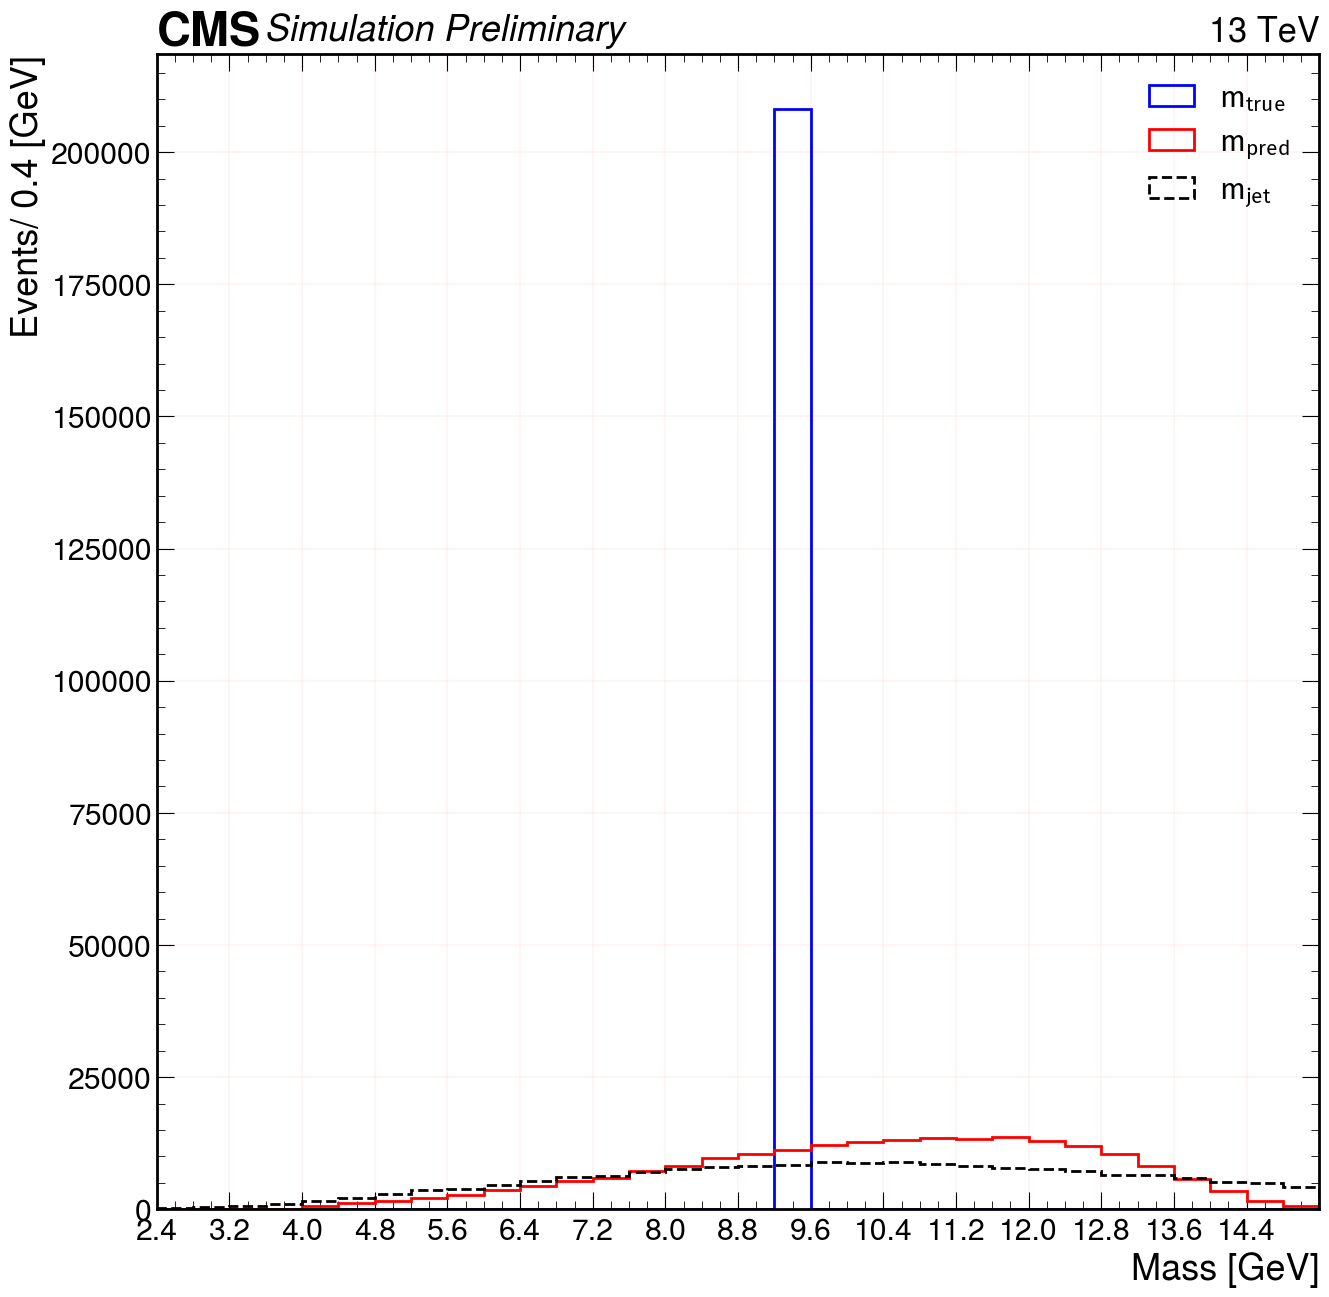

In [95]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_5ch/INFERENCE_DATA/INFERENCE_5_channels_UToTauTau_pT30To180_with_mass1p2To17p2_v2/epoch15_val_pseudoscalar_mae2.0441_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_jet_ = data["m0"]


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label=r'$\mathrm{m_{jet}}$', linestyle='--', color='black', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()